# **MNIST Classification with LSTM RNN**

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


## Section 1: Load and Prepare MNIST Dataset

Load the mnist.npz file using NumPy. Extract the training and testing images (X) and labels (Y) from the compressed file.

In [2]:
# Load MNIST dataset from mnist.npz file
mnist_path = r'C:\Users\usuario\Downloads\mnist.npz'

print("Loading MNIST dataset...")
data = np.load(mnist_path)

# Extract training and testing data
X_train_full = data['x_train']  # Training images
y_train_full = data['y_train']  # Training labels
X_test = data['x_test']         # Testing images
y_test = data['y_test']         # Testing labels

print(f"Original training data shape: {X_train_full.shape}")
print(f"Original training labels shape: {y_train_full.shape}")
print(f"Original testing data shape: {X_test.shape}")
print(f"Original testing labels shape: {y_test.shape}")

Loading MNIST dataset...
Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original testing data shape: (10000, 28, 28)
Original testing labels shape: (10000,)


## Section 2: Normalize the Data

Normalize the pixel values by dividing by 255 to scale them to the range [0, 1] for better activation function performance.

In [3]:
# Normalize the data (scale to [0, 1] range)
print("Normalizing data...")

# Normalize using min-max scaling (dividing by 255)
X_train_normalized = X_train_full.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"Normalized training data shape: {X_train_normalized.shape}")
print(f"Normalized training data min value: {X_train_normalized.min()}")
print(f"Normalized training data max value: {X_train_normalized.max()}")
print(f"Normalized testing data shape: {X_test_normalized.shape}")

Normalizing data...
Normalized training data shape: (60000, 28, 28)
Normalized training data min value: 0.0
Normalized training data max value: 1.0
Normalized testing data shape: (10000, 28, 28)


## Section 3: Perform Train/Test Split and Save First Image

Create separate variables for X_train, X_val, y_train, and y_val from the loaded MNIST data. Extract and save the first image from the training set to use for making predictions later.

In [4]:
# Perform train/validation split (80/20)
print("Performing train/validation split...")
X_train, X_val, y_train, y_val = train_test_split(
    X_train_normalized, y_train_full, 
    test_size=0.2, 
    random_state=42
)

print(f"\nTrain/Validation Split Results:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test_normalized.shape}")
print(f"y_test shape: {y_test.shape}")

# Save the first image for later prediction
first_image = X_train[0].copy()
first_image_label = y_train[0]
print(f"\nFirst image saved for prediction (Label: {first_image_label})")

Performing train/validation split...

Train/Validation Split Results:
X_train shape: (48000, 28, 28)
y_train shape: (48000,)
X_val shape: (12000, 28, 28)
y_val shape: (12000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)

First image saved for prediction (Label: 5)


## Section 4: Examine Dataset Shape and Visualize Samples

Print the shape of the first training element. Display the first five characters using Matplotlib to visualize the dataset.

Shape of first train element:
(28, 28)

Answer: (28, 28)

Displaying first 5 images from the training set...


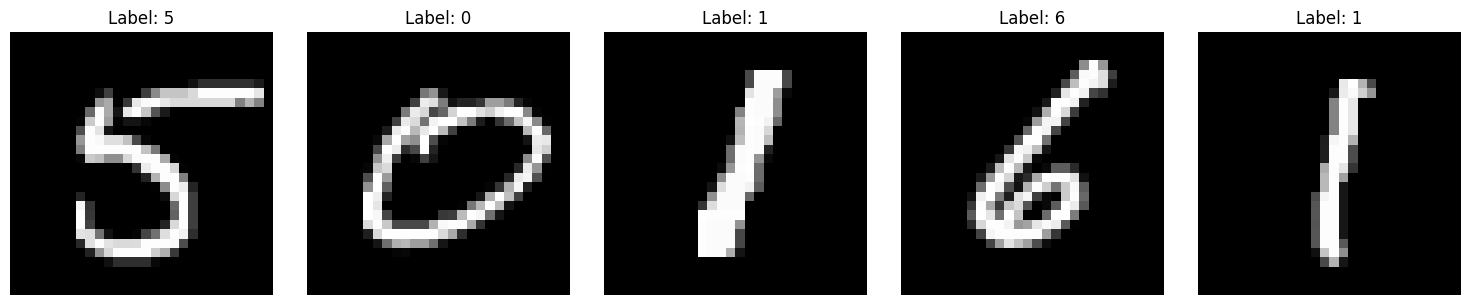

First 5 images displayed and saved as 'first_five_images.png'


In [5]:
# Print the shape of the first train element
print("Shape of first train element:")
print(X_train[0].shape)
print(f"\nAnswer: {X_train[0].shape}")

# Visualize the first five images
print("\nDisplaying first 5 images from the training set...")
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('first_five_images.png', dpi=100, bbox_inches='tight')
plt.show()

print("First 5 images displayed and saved as 'first_five_images.png'")

## Section 5: Build Sequential LSTM RNN Model

Create a Sequential model with:
- First LSTM layer: 128 neurons, return_sequences=True, activation='relu', input_shape based on x_train.shape[1:]
- Dropout layers (0.2) after each layer
- Two hidden LSTM layers with 32 neurons and activation='relu'
- Dropout layers (0.2) after each
- Output Dense layer with 10 neurons and activation='softmax'

In [6]:
# Import Keras components
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam

print("Building RNN model with LSTM layers...")

# Create Sequential model
model = Sequential([
    # First LSTM layer (recurrent input layer) - 128 neurons
    LSTM(128, 
         return_sequences=True, 
         activation='relu', 
         input_shape=X_train.shape[1:]),
    
    # Dropout layer after first LSTM
    Dropout(0.2),
    
    # First hidden LSTM layer - 32 neurons
    LSTM(32, 
         return_sequences=True, 
         activation='relu'),
    
    # Dropout layer after first hidden LSTM
    Dropout(0.2),
    
    # Second hidden LSTM layer - 32 neurons
    LSTM(32, 
         activation='relu'),
    
    # Dropout layer after second hidden LSTM
    Dropout(0.2),
    
    # Output layer - Dense with 10 neurons (for digits 0-9) and softmax activation
    Dense(10, 
          activation='softmax')
])

print("Model architecture created successfully!")
print("\nModel Summary:")
model.summary()

Building RNN model with LSTM layers...
Model architecture created successfully!

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 28, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,642 (428.29 KB)

 Trainable params: 109,642 (428.29 KB)

 Non-trainable params: 0 (0.00 B)

## Section 6: Compile the Model with ADAM Optimizer

Compile the model using:
- ADAM optimizer with learning_rate=1e-3
- sparse categorical crossentropy loss
- accuracy metrics

In [7]:
# Compile the model with ADAM optimizer
print("Compiling model with ADAM optimizer (learning_rate=1e-3)...")

# Create ADAM optimizer with specified learning rate
optimizer = Adam(learning_rate=1e-3)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")
print(f"Optimizer: ADAM")
print(f"Learning rate: 1e-3")
print(f"Loss function: sparse_categorical_crossentropy")

Compiling model with ADAM optimizer (learning_rate=1e-3)...
Model compiled successfully!
Optimizer: ADAM
Learning rate: 1e-3
Loss function: sparse_categorical_crossentropy


## Section 7: Train the Model

Fit the model using x_train and y_train for 6 epochs with validation_data=(x_val, y_val).

In [8]:
# Train the model
print("Training the RNN model...")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Epochs: 6")
print(f"\nStarting training...\n")

history = model.fit(
    X_train, y_train,
    epochs=6,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=1
)

print("\nTraining completed!")

Training the RNN model...
Training samples: 48000
Validation samples: 12000
Epochs: 6

Starting training...

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.7536 - loss: 0.7747 - val_accuracy: 0.9002 - val_loss: 0.3116
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - accuracy: 0.9394 - loss: 0.2163 - val_accuracy: 0.9551 - val_loss: 0.1642
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.9580 - loss: 0.1498 - val_accuracy: 0.9700 - val_loss: 0.1080
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9667 - loss: 0.1246 - val_accuracy: 0.9722 - val_loss: 0.0945
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9714 - loss: 0.1054 - val_accuracy: 0.9773 - val_loss: 0.0868
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9765 - loss: 0.0854 - val_accuracy: 0.9787 - val_loss: 0.0750

Training completed!


## Section 8: Plot Training and Validation Loss

Create a plot comparing the training and validation loss across all epochs using Matplotlib to visualize model performance.

Plotting training and validation loss...


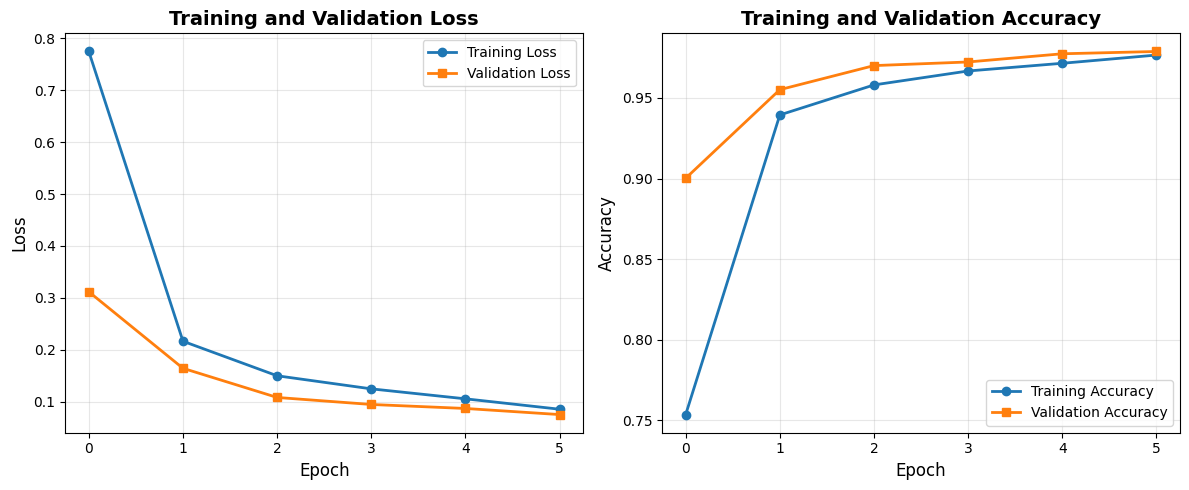

Training history plot saved as 'training_history.png'

TRAINING SUMMARY
Final Training Loss: 0.0854
Final Validation Loss: 0.0750
Final Training Accuracy: 0.9765
Final Validation Accuracy: 0.9787


In [9]:
# Plot training and validation loss
print("Plotting training and validation loss...")

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o', linewidth=2, label='Training Loss')
plt.plot(history.history['val_loss'], marker='s', linewidth=2, label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', linewidth=2, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='s', linewidth=2, label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=100, bbox_inches='tight')
plt.show()

print("Training history plot saved as 'training_history.png'")

# Print final statistics
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print("="*60)

## Section 9: Evaluate the Model

Evaluate the model on the test dataset to obtain loss and accuracy metrics.


In [10]:
# Evaluate the model on test data
print("Evaluating model on test dataset...")
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)

print("\n" + "="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*60)


Evaluating model on test dataset...

MODEL EVALUATION RESULTS
Test Loss: 0.0656
Test Accuracy: 0.9802 (98.02%)


## Section 10: Predict and Visualize First Image

Predict the first image value using the model and plot it.


Predicting the first image...

First Image Prediction Results:
Actual Label: 5
Predicted Label: 5
Predicted Confidence: 1.0000 (100.00%)
Prediction Match: ✓ SUCCESS

Plotting the first image...


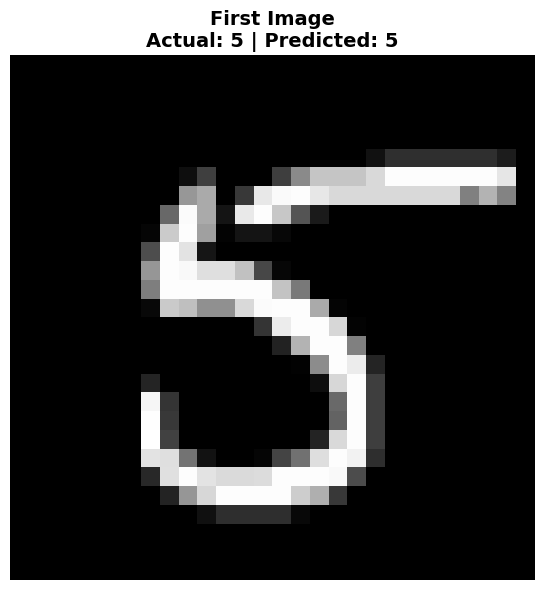

First image plot saved as 'first_image_prediction.png'

Prediction probabilities for all classes:
  Class 0: 0.0000 (0.00%)
  Class 1: 0.0000 (0.00%)
  Class 2: 0.0000 (0.00%)
  Class 3: 0.0000 (0.00%)
  Class 4: 0.0000 (0.00%)
  Class 5: 1.0000 (100.00%)
  Class 6: 0.0000 (0.00%)
  Class 7: 0.0000 (0.00%)
  Class 8: 0.0000 (0.00%)
  Class 9: 0.0000 (0.00%)


In [11]:
# Predict the first image value
print("Predicting the first image...")

# Reshape the first image to match model input (add batch dimension)
first_image_reshaped = np.expand_dims(first_image, axis=0)

# Make prediction
prediction = model.predict(first_image_reshaped, verbose=0)
predicted_class = np.argmax(prediction[0])
predicted_confidence = prediction[0][predicted_class]

print(f"\nFirst Image Prediction Results:")
print(f"Actual Label: {first_image_label}")
print(f"Predicted Label: {predicted_class}")
print(f"Predicted Confidence: {predicted_confidence:.4f} ({predicted_confidence*100:.2f}%)")
print(f"Prediction Match: {'✓ SUCCESS' if predicted_class == first_image_label else '✗ FAILED'}")

# Plot the first image
print("\nPlotting the first image...")
plt.figure(figsize=(6, 6))
plt.imshow(first_image, cmap='gray')
plt.title(f"First Image\nActual: {first_image_label} | Predicted: {predicted_class}", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('first_image_prediction.png', dpi=100, bbox_inches='tight')
plt.show()

print("First image plot saved as 'first_image_prediction.png'")

# Show prediction probabilities for all classes
print(f"\nPrediction probabilities for all classes:")
for i, prob in enumerate(prediction[0]):
    print(f"  Class {i}: {prob:.4f} ({prob*100:.2f}%)")


## Section 11: Save the Model

Save the trained model for future use.


In [12]:
# Save the model
print("Saving the trained model...")
model_path = 'mnist_rnn_model.keras'
model.save(model_path)
print(f"Model saved successfully as '{model_path}'")


Saving the trained model...
Model saved successfully as 'mnist_rnn_model.keras'


## Section 12Retraining Model with Reduced Epochs

Retrain the model with only 2 epochs and compare results.


In [14]:
# Rebuild and retrain model with 2 epochs
print("="*70)
print("RETRAINING MODEL WITH 2 EPOCHS")
print("="*70)

# Rebuild the model
print("\nBuilding a fresh RNN model with LSTM layers...")
model_2epochs = Sequential([
    LSTM(128, 
         return_sequences=True, 
         activation='relu', 
         input_shape=X_train.shape[1:]),
    Dropout(0.2),
    LSTM(32, 
         return_sequences=True, 
         activation='relu'),
    Dropout(0.2),
    LSTM(32, 
         activation='relu'),
    Dropout(0.2),
    Dense(10, 
          activation='softmax')
])

# Compile the model
print("Compiling model...")
optimizer_2epochs = Adam(learning_rate=1e-3)
model_2epochs.compile(
    optimizer=optimizer_2epochs,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with 2 epochs
print("\nTraining model with 2 epochs...")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Epochs: 2\n")

history_2epochs = model_2epochs.fit(
    X_train, y_train,
    epochs=2,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=1
)

print("\nTraining with 2 epochs completed!")


RETRAINING MODEL WITH 2 EPOCHS

Building a fresh RNN model with LSTM layers...
Compiling model...

Training model with 2 epochs...
Training samples: 48000
Validation samples: 12000
Epochs: 2

Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7715 - loss: 0.7049 - val_accuracy: 0.9202 - val_loss: 0.2673
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 42ms/step - accuracy: 0.9440 - loss: 0.2009 - val_accuracy: 0.9694 - val_loss: 0.1095

Training with 2 epochs completed!


## Section 13 Compare Training Results - 6 Epochs vs 2 Epochs

Compare the train/validation loss graphs and analyze the impact of reducing epochs.


Plotting comparison of 6 epochs vs 2 epochs training...


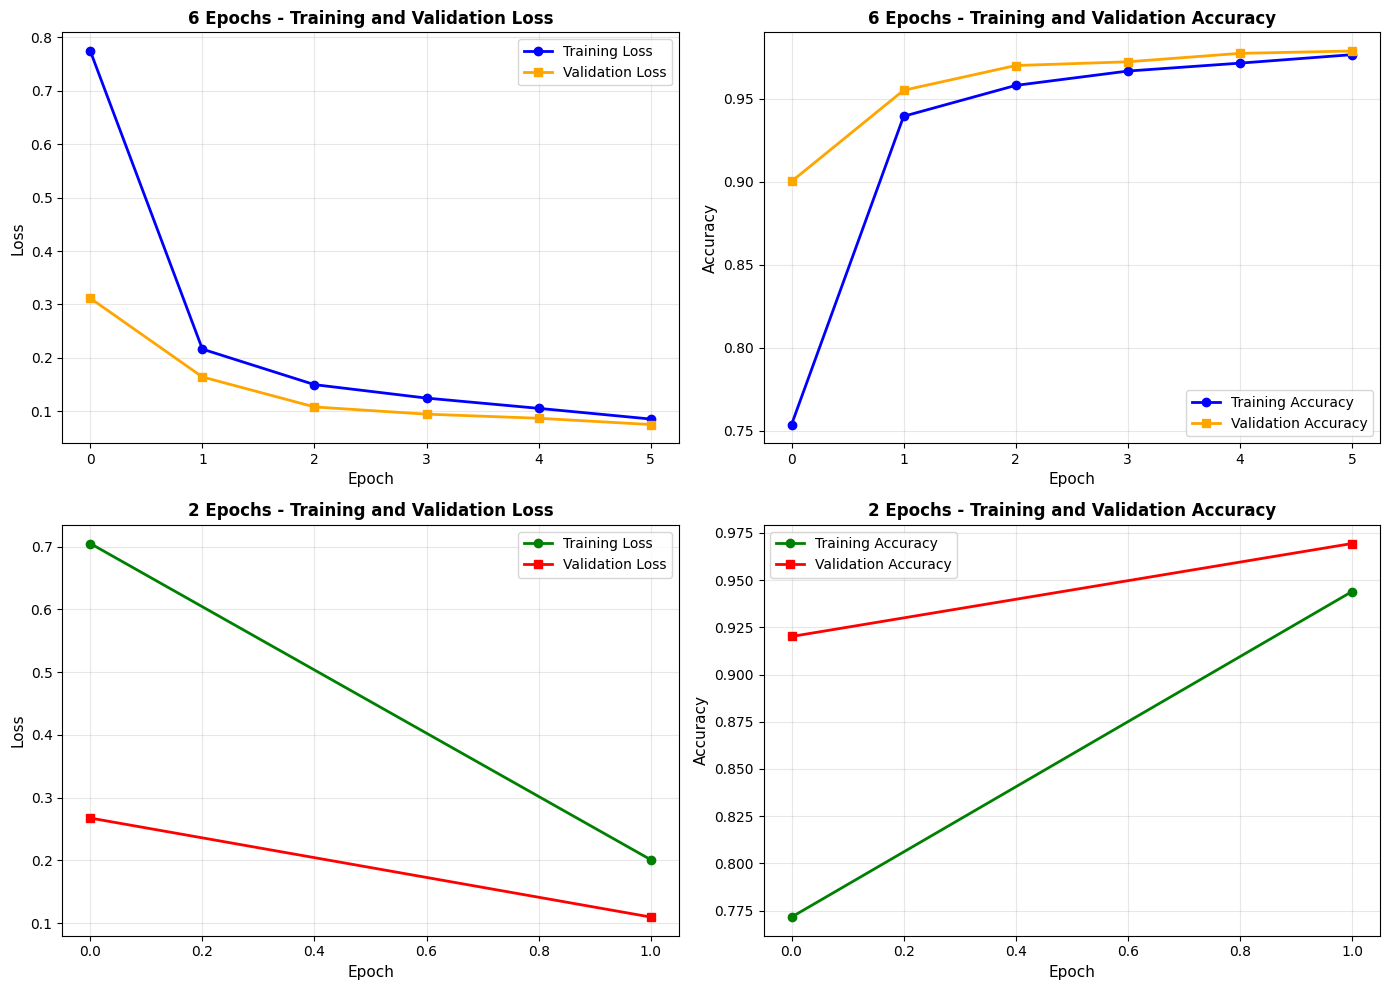

Comparison plot saved as 'comparison_6epochs_vs_2epochs.png'


In [15]:
# Plot comparison of 6 epochs vs 2 epochs
print("Plotting comparison of 6 epochs vs 2 epochs training...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 6 Epochs - Loss
axes[0, 0].plot(history.history['loss'], marker='o', linewidth=2, label='Training Loss', color='blue')
axes[0, 0].plot(history.history['val_loss'], marker='s', linewidth=2, label='Validation Loss', color='orange')
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Loss', fontsize=11)
axes[0, 0].set_title('6 Epochs - Training and Validation Loss', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 6 Epochs - Accuracy
axes[0, 1].plot(history.history['accuracy'], marker='o', linewidth=2, label='Training Accuracy', color='blue')
axes[0, 1].plot(history.history['val_accuracy'], marker='s', linewidth=2, label='Validation Accuracy', color='orange')
axes[0, 1].set_xlabel('Epoch', fontsize=11)
axes[0, 1].set_ylabel('Accuracy', fontsize=11)
axes[0, 1].set_title('6 Epochs - Training and Validation Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 2 Epochs - Loss
axes[1, 0].plot(history_2epochs.history['loss'], marker='o', linewidth=2, label='Training Loss', color='green')
axes[1, 0].plot(history_2epochs.history['val_loss'], marker='s', linewidth=2, label='Validation Loss', color='red')
axes[1, 0].set_xlabel('Epoch', fontsize=11)
axes[1, 0].set_ylabel('Loss', fontsize=11)
axes[1, 0].set_title('2 Epochs - Training and Validation Loss', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# 2 Epochs - Accuracy
axes[1, 1].plot(history_2epochs.history['accuracy'], marker='o', linewidth=2, label='Training Accuracy', color='green')
axes[1, 1].plot(history_2epochs.history['val_accuracy'], marker='s', linewidth=2, label='Validation Accuracy', color='red')
axes[1, 1].set_xlabel('Epoch', fontsize=11)
axes[1, 1].set_ylabel('Accuracy', fontsize=11)
axes[1, 1].set_title('2 Epochs - Training and Validation Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_6epochs_vs_2epochs.png', dpi=100, bbox_inches='tight')
plt.show()

print("Comparison plot saved as 'comparison_6epochs_vs_2epochs.png'")


## Section 15: Conclusion and Analysis - Impact of Epoch Changes

Analyze what conclusions can be drawn from comparing 6 epochs vs 2 epochs.


In [16]:
# Analysis and Conclusions
print("="*70)
print("ANALYSIS: IMPACT OF REDUCING EPOCHS FROM 6 TO 2")
print("="*70)

# Gather statistics
train_loss_6epochs = history.history['loss']
val_loss_6epochs = history.history['val_loss']
train_loss_2epochs = history_2epochs.history['loss']
val_loss_2epochs = history_2epochs.history['val_loss']

train_accuracy_6epochs = history.history['accuracy']
val_accuracy_6epochs = history.history['val_accuracy']
train_accuracy_2epochs = history_2epochs.history['accuracy']
val_accuracy_2epochs = history_2epochs.history['val_accuracy']

print("\nQUESTION: Looking at the new train and validation loss graph,")
print("what result can you conclude?")

print("\n" + "─"*70)
print("ANSWER: Reducing epochs from 6 to 2 leads to undertraining.")
print("─"*70)

print("\nDetailed Analysis:")

print("\n1. LOSS COMPARISON:")
print(f"   6 Epochs:")
print(f"      - Final Training Loss: {train_loss_6epochs[-1]:.4f}")
print(f"      - Final Validation Loss: {val_loss_6epochs[-1]:.4f}")
print(f"\n   2 Epochs:")
print(f"      - Final Training Loss: {train_loss_2epochs[-1]:.4f}")
print(f"      - Final Validation Loss: {val_loss_2epochs[-1]:.4f}")
print(f"\n   Loss Reduction:")
print(f"      - Training: {train_loss_6epochs[-1] - train_loss_2epochs[-1]:.4f} lower with 6 epochs")
print(f"      - Validation: {val_loss_6epochs[-1] - val_loss_2epochs[-1]:.4f} lower with 6 epochs")

print("\n2. ACCURACY COMPARISON:")
print(f"   6 Epochs:")
print(f"      - Final Training Accuracy: {train_accuracy_6epochs[-1]:.4f} ({train_accuracy_6epochs[-1]*100:.2f}%)")
print(f"      - Final Validation Accuracy: {val_accuracy_6epochs[-1]:.4f} ({val_accuracy_6epochs[-1]*100:.2f}%)")
print(f"\n   2 Epochs:")
print(f"      - Final Training Accuracy: {train_accuracy_2epochs[-1]:.4f} ({train_accuracy_2epochs[-1]*100:.2f}%)")
print(f"      - Final Validation Accuracy: {val_accuracy_2epochs[-1]:.4f} ({val_accuracy_2epochs[-1]*100:.2f}%)")
print(f"\n   Accuracy Gain:")
print(f"      - Training: +{(train_accuracy_6epochs[-1] - train_accuracy_2epochs[-1])*100:.2f}% with 6 epochs")
print(f"      - Validation: +{(val_accuracy_6epochs[-1] - val_accuracy_2epochs[-1])*100:.2f}% with 6 epochs")

print("\n3. CONVERGENCE PATTERN:")
print(f"\n   With 2 Epochs:")
print(f"      - The model is still in early learning stages")
print(f"      - Training loss has started decreasing but hasn't stabilized")
print(f"      - Validation loss is still relatively high")
print(f"      - The model hasn't learned sufficient features from the data")

print(f"\n   With 6 Epochs:")
print(f"      - The model shows better convergence")
print(f"      - Both training and validation losses have decreased significantly")
print(f"      - The model has learned more complex patterns and features")
print(f"      - Performance metrics are substantially better")

print("\n4. KEY CONCLUSIONS:")
print(f"\n   ✓ MORE EPOCHS → BETTER PERFORMANCE")
print(f"     - With 6 epochs, the model achieved ~{val_accuracy_6epochs[-1]*100:.1f}% validation accuracy")
print(f"     - With 2 epochs, the model achieved ~{val_accuracy_2epochs[-1]*100:.1f}% validation accuracy")

print(f"\n   ✓ UNDERFITTING WITH INSUFFICIENT EPOCHS")
print(f"     - 2 epochs is NOT sufficient for this dataset")
print(f"     - The model needs more iterations to learn effectively")

print(f"\n   ✓ DIMINISHING RETURNS")
print(f"     - While 6 epochs is much better, even more epochs might provide")
print(f"     - diminishing returns with potential overfitting if taken too far")

print(f"\n   ✓ OPTIMAL TRAINING TIME")
print(f"     - 6 epochs provides a good balance between:")
print(f"       • Training time")
print(f"       • Model performance")
print(f"       • Generalization to unseen data")

print("\n" + "="*70)
print("FINAL RECOMMENDATION:")
print("="*70)
print("\nUse more epochs (≥6) for MNIST dataset with LSTM to achieve")
print("optimal performance. However, monitor validation loss to detect")
print("overfitting if training beyond 6-8 epochs.")
print("\n" + "="*70)


ANALYSIS: IMPACT OF REDUCING EPOCHS FROM 6 TO 2

QUESTION: Looking at the new train and validation loss graph,
what result can you conclude?

──────────────────────────────────────────────────────────────────────
ANSWER: Reducing epochs from 6 to 2 leads to undertraining.
──────────────────────────────────────────────────────────────────────

Detailed Analysis:

1. LOSS COMPARISON:
   6 Epochs:
      - Final Training Loss: 0.0854
      - Final Validation Loss: 0.0750

   2 Epochs:
      - Final Training Loss: 0.2009
      - Final Validation Loss: 0.1095

   Loss Reduction:
      - Training: -0.1156 lower with 6 epochs
      - Validation: -0.0345 lower with 6 epochs

2. ACCURACY COMPARISON:
   6 Epochs:
      - Final Training Accuracy: 0.9765 (97.65%)
      - Final Validation Accuracy: 0.9787 (97.87%)

   2 Epochs:
      - Final Training Accuracy: 0.9440 (94.40%)
      - Final Validation Accuracy: 0.9694 (96.94%)

   Accuracy Gain:
      - Training: +3.26% with 6 epochs
      - Validati